In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


### Basic Imports :

In [2]:
#https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline


pd.pandas.set_option('display.max_rows', None)
from matplotlib import *
import sys
from pylab import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
# imports from sklearn regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# standardization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#  import from sklearn - metrices
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_squared_error, mean_absolute_error


### Load Data and basic informations:

In [4]:
df = pd.read_csv('/kaggle/input/focusing-on-mobile-app-or-website//Ecommerce Customers')

df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.shape

(500, 8)

In [6]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

We do not have any NULL data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


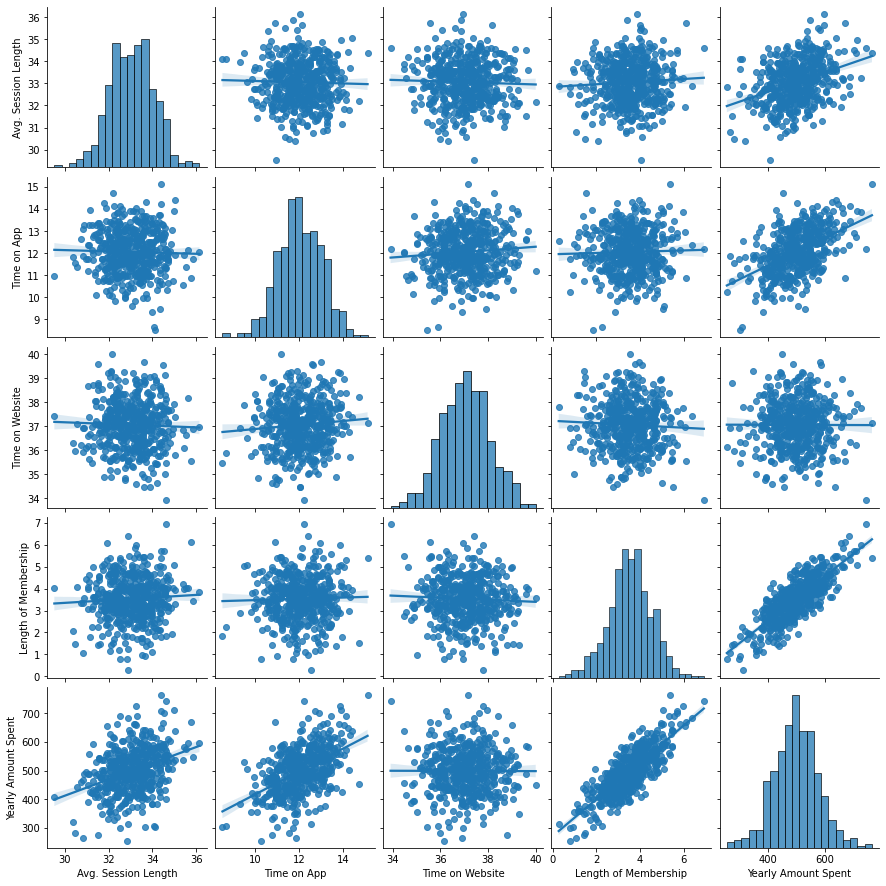

In [9]:
sns.pairplot(df, kind = 'reg')

In [10]:
df.head()

df1 = pd.DataFrame()
df1 = df
df1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df1.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)

In [12]:
df1.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
df1_columns = df1.columns
df1_columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

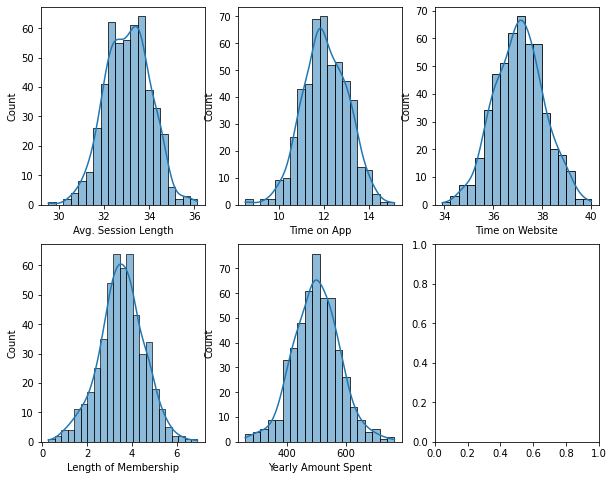

In [14]:
fig, axes = plt.subplots(2,3, figsize=(10,8))
si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,1]]

for i in range (len(df1_columns)):
    j = si1[i][0]
    k = si1[i][1]
    sns.histplot(df1[df1_columns[i]], kde = True, ax = axes[j,k])
    
plt.show()   

These distributions are not perfectly gaussian, except for 'Length of Membership'. 

Now let us find the outliers: 

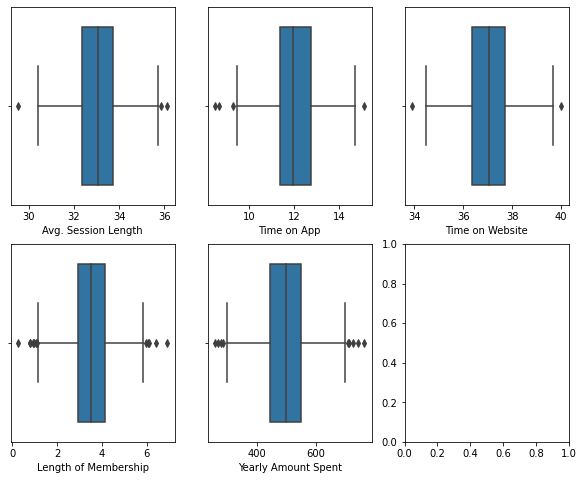

In [15]:
fig, axes = plt.subplots(2,3, figsize=(10,8))
si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]

for i in range (len(df1_columns)):
    j = si1[i][0]
    k = si1[i][1]
    sns.boxplot(df1[df1_columns[i]],  ax = axes[j,k])
    
plt.show()

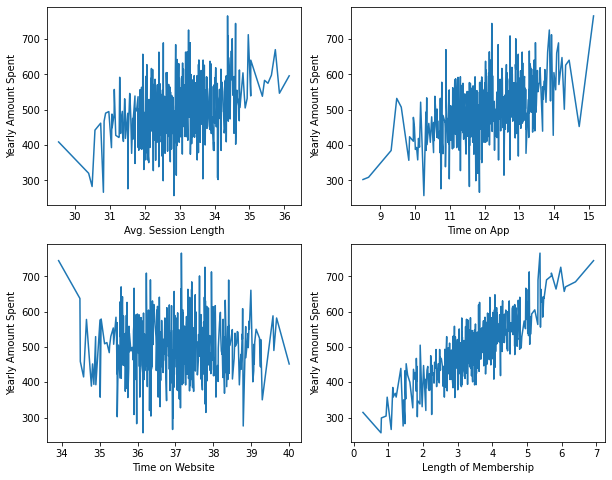

In [16]:
fig, axes = plt.subplots(2,2, figsize=(10,8))
si1 = [[0,0], [0,1], [1,0], [1,1], ]

for i in range (len(df1_columns) - 1):
    j = si1[i][0]
    k = si1[i][1]
    sns.lineplot(data = df1, x = df1[df1_columns[i]], y = 'Yearly Amount Spent', ax = axes[j,k])
    
plt.show()     

**Observation :**

The 'Yearly Amount Spent' has an increasing trend with 'Average Session Length' and 
'Time on App'. The feature 'Yearly Amount Spent' has a flat trend as a function of 
'Time on Website'. But it shows that on an average, customers have spent around 37 (unit is not mentioned, so let me take it as hrs.) units. It seems like, personal sessions and app has more contribution towards profit.


In [17]:
df1.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

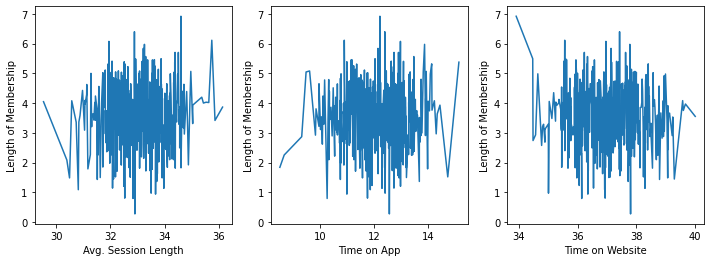

In [18]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
#si1 = [0,1,2]

for i in range (len(df1_columns)-2):
 #   j = si[i]
    sns.lineplot(data = df1, x = df1[df1_columns[i]], y = 'Length of Membership', ax = axes[i])
    
plt.show()      

In [19]:
# Let us check the correlation among the features

df1.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


**Observation:**

1. 'Average session Length' is negatively correlated with 'Time on App' and 'Time on Website', which seems to be a very natural behavior. Person investing time on one to one with stylist will spend lesser time on app and website. 

2. 'Time on Website' is negatively correlated with 'Avg. Session Length', 'Length of Membership' and 'Yearly Amount Spent'. 

3. 'Length of Membership' has much greater correlation with 'Yearly Amount Spent'. This seems to be fair enough. 

Here the aim is to decide whether one should go for app or website we need to very sure that if the feature Length of Membership is correlated to any of these variables (i.e., Avg. Session Length, Time on App and Time on Website). Because it is pretty obvious that if the Length of Membership is more, Yearly Amount Spent will be more.


<AxesSubplot:>

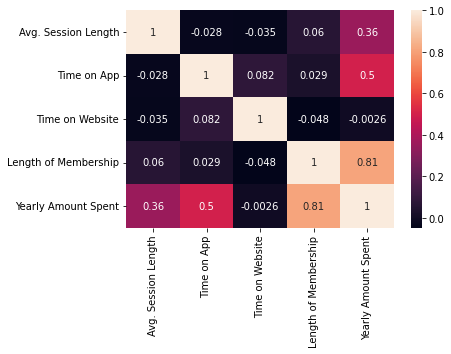

In [20]:
sns.heatmap(df1.corr(), annot = True)

Let's try to look at the Variance Inflation factor (VIF) and try to understand the correlation among the features.

**VIF:**

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df1[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership',]]
x = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)   

                feature          VIF
0                 const  2657.483692
1   Avg. Session Length     1.005422
2           Time on App     1.008684
3       Time on Website     1.010275
4  Length of Membership     1.006949


In [22]:
# ref : https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y) 
                
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [23]:
calculate_vif(df=df, features=['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'])

,VIF,Tolerance
Avg. Session Length,1.005422,0.994608
Time on App,1.008684,0.991390
Time on Website,1.010275,0.989829
Length of Membership,1.006949,0.993099


All the variables look fine. We can go ahead for model building. 

# Model :

In [24]:
# input features : 
X = df1[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
#X = df1[['Avg. Session Length', 'Time on App', 'Time on Website']]
#X = df1[['Avg. Session Length', 'Time on App',  'Length of Membership']]
#X = df1[['Time on App', 'Time on Website', 'Length of Membership']]
# output features
y = df1['Yearly Amount Spent']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
## scaling part for linear, logistic and knn should go here. 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**Before digging deep let us try to understand the relation 
of various input features with the target feature.**

In [27]:
# instantiate and fit
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print(lm.intercept_)
print(lm.coef_)

# pair the feature names with the coefficients
list(zip(X.columns, lm.coef_))


-1051.5942553006246
[25.73427108 38.70915381  0.43673884 61.57732375]


[('Avg. Session Length', 25.734271084705068),
 ('Time on App', 38.70915381083435),
 ('Time on Website', 0.4367388355942867),
 ('Length of Membership', 61.57732375487838)]

**Observation:**

This shows that the target variable has the least dependence on 'Time on Website' and greater dependence on 'Length on Membership'. This is same as we have observed in heatmap plot. 


So, as a primary conclusion we can say that the particular 
company should go for app rather than website.


But let us try to dig deeper and try to build a model in a 
systematic and refined way and take a look at the predictions and compare with y_test. So, initially while model building 
we will keep all the features and later decide how to proceed.

In [28]:
regessor = LinearRegression() 
regessorlasso = Lasso()
regessorridge = Ridge()
regessorknn = KNeighborsRegressor()
regessorsvr = SVR()
regessordt = DecisionTreeRegressor()
regressorRF = RandomForestRegressor()

In [29]:
regessor.fit(X_train_scaled, y_train)
regessorlasso.fit(X_train_scaled, y_train)
regessorridge.fit(X_train_scaled, y_train)
regessorknn.fit(X_train_scaled, y_train)
regessorsvr.fit(X_train_scaled, y_train)
regessordt.fit(X_train, y_train)
regressorRF.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
predict_liregression = regessor.predict(X_test_scaled)
predict_lasso = regessorlasso.predict(X_test_scaled)
predict_ridge = regessorridge.predict(X_test_scaled)
predict_knn = regessorknn.predict(X_test_scaled)
predict_dtr = regessordt.predict(X_test)
predict_svr = regessorsvr.predict(X_test_scaled)
predict_rf = regressorRF.predict(X_test)


In [31]:
# putting everything at one place. 

ltype = [predict_liregression, predict_lasso, predict_ridge, predict_knn, predict_dtr, predict_svr, predict_rf]

lr2 = list()
lmae = list()
lmse = list()
lrmse = list()


for i in ltype: 
    lr2.append(r2_score(y_test, i))
    lmae.append(mean_absolute_error(y_test, i))
    lmse.append(mean_squared_error(y_test, i))
    lrmse.append(np.sqrt(mean_squared_error(y_test, i)))
    
    
    
dfscore = pd.DataFrame({'R2 Score' : lr2, 'MAE' : lmae, 'MSE': lmse, 'RMSE' : lrmse}, 
                         index = ['Linear Regression', 'Lasso', 'Ridge', 
                                  'KNN', 'Decision Tree', 'SVR', 'Random Forest'])
dfscore.sort_values(by=['R2 Score'], ascending = False)

,R2 Score,MAE,MSE,RMSE
Lasso,0.957687,12.239555,229.916677,15.163004
Ridge,0.950491,13.417805,269.016733,16.401730
Random Forest,0.948220,13.092798,281.358340,16.773740
KNN,0.903208,17.524196,525.937503,22.933327
Linear Regression,0.899015,19.409634,548.722822,23.424833
Decision Tree,0.878811,19.633258,658.506696,25.661385
SVR,0.305226,44.897936,3775.201520,61.442669


In [32]:
lnames = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

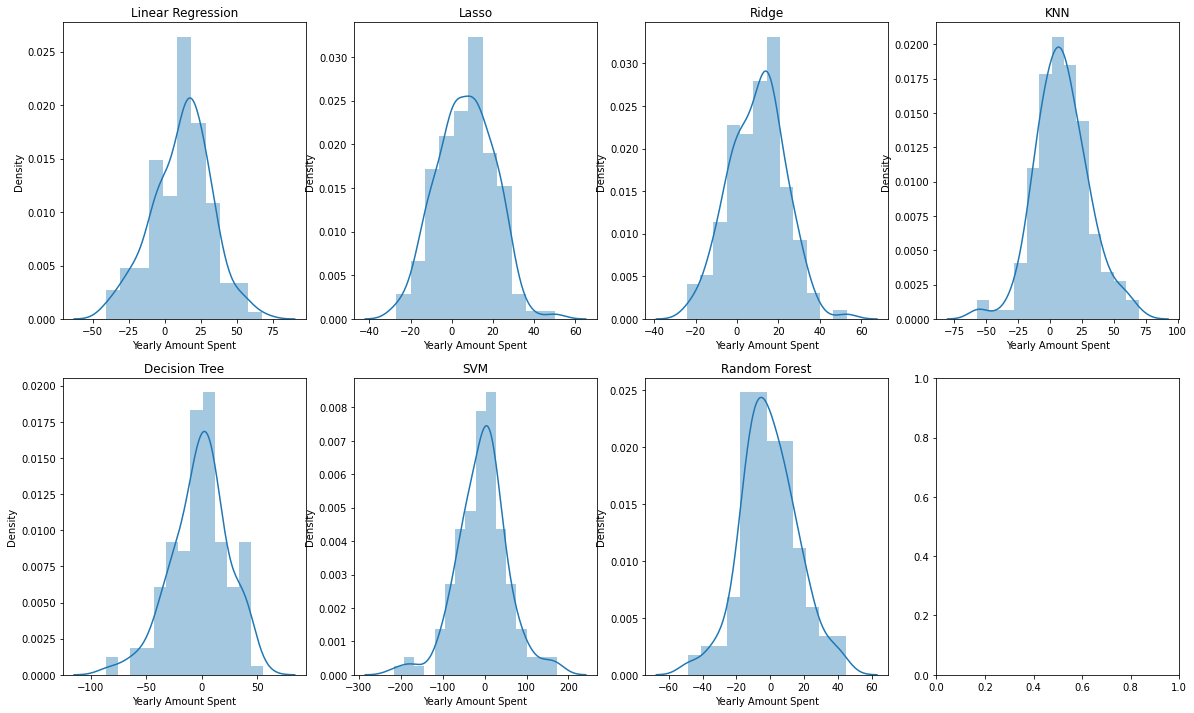

In [33]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.distplot(y_test - ltype[items], kde = True, ax=axes[i,j])
    axes[i,j].set_title(lnames[items])   
    #axes[i,j].set(xlim=(-20, 20))
    
    
plt.show()

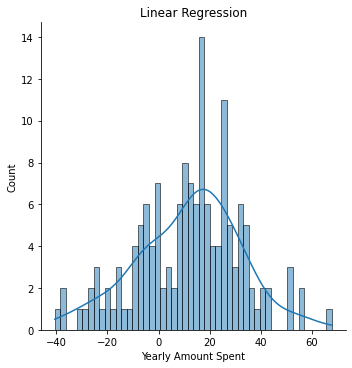

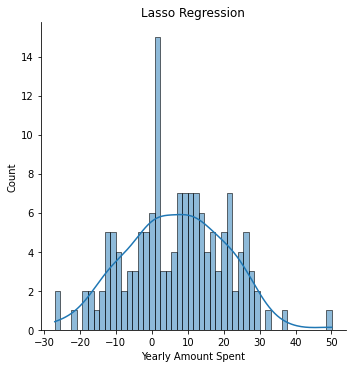

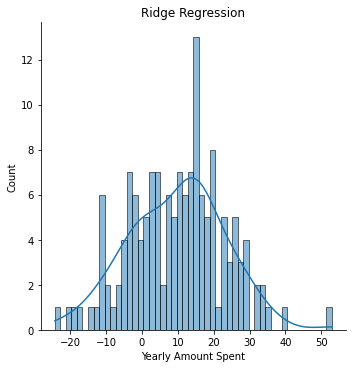

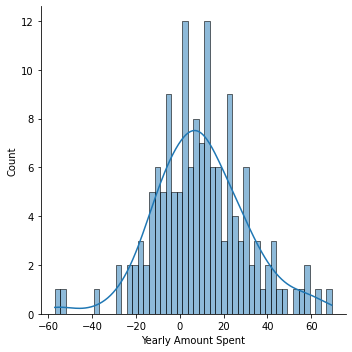

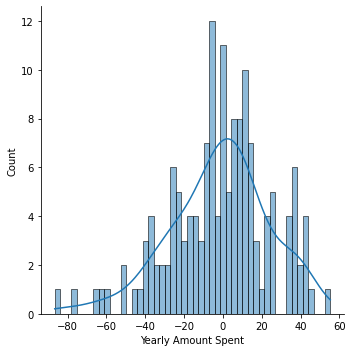

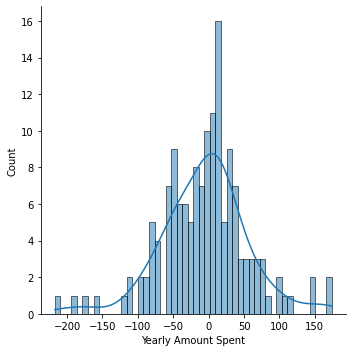

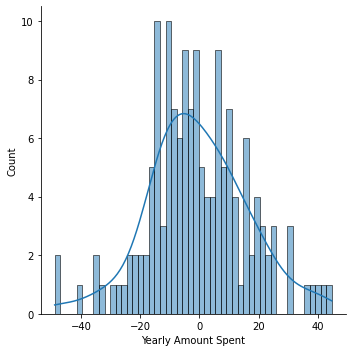

In [34]:
nbins = 50

sns.displot(y_test - predict_liregression, kde = True, bins = nbins)
plt.title('Linear Regression')
sns.displot(y_test - predict_lasso, kde = True, bins = nbins)
plt.title('Lasso Regression')
sns.displot(y_test - predict_ridge, kde = True, bins = nbins)
plt.title('Ridge Regression')
sns.displot(y_test - predict_knn, kde = True, bins = nbins)
sns.displot(y_test - predict_dtr, kde = True, bins = nbins)
sns.displot(y_test - predict_svr, kde = True, bins = nbins)
sns.displot(y_test - predict_rf, kde = True, bins = nbins)
plt.show()

The R2 scores are good but the errors are too high. Also the residuals look very bad. Let us try to remove the outliers and check if the situation improves. 

Avg. Session Length       1.370163
Time on App               1.365696
Time on Website           1.367175
Length of Membership      1.196052
Yearly Amount Spent     104.275551
dtype: float64
-----------------------
(476, 5)
------------------------


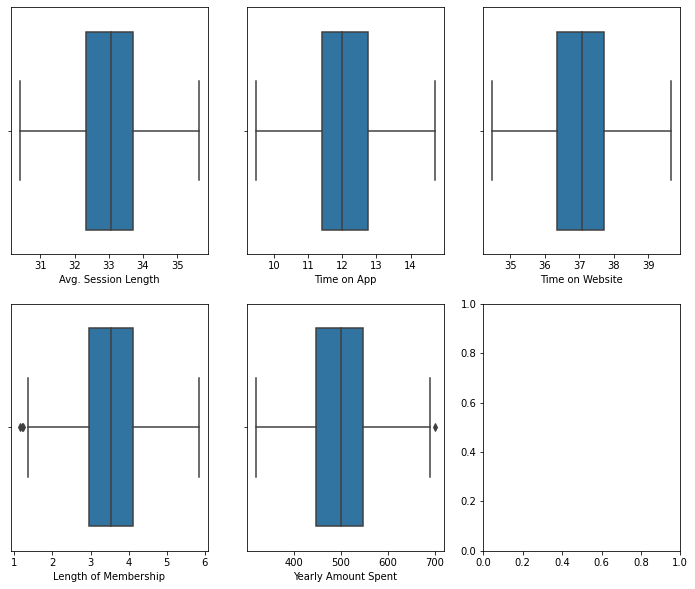

In [35]:
df2 = df1.copy()
l_feat = df2.columns

# putting limits 
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('-----------------------')
# removing outliers
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |
                (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2_out.shape)
print('------------------------')

#plotting : 
fig, axes = plt.subplots(2,3, figsize=(12,10))
si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]

for i in range (len(df2_out.columns)):
    j = si1[i][0]
    k = si1[i][1]
    sns.boxplot(df2_out[df2_out.columns[i]],  ax = axes[j,k])
    
plt.show()    

Text(0.5, 1.0, 'Before removing Outliers')

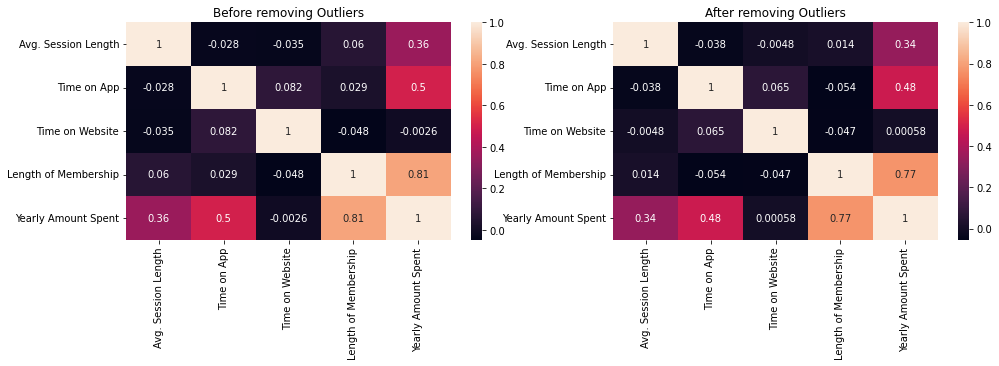

In [36]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

sns.heatmap(df2_out.corr(), annot=True, ax = axes[1])
axes[1].set_title('After removing Outliers')
sns.heatmap(df1.corr(), annot = True, ax = axes[0])
axes[0].set_title('Before removing Outliers')

In [37]:
df2_out.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [38]:
X1 = df2_out[['Avg. Session Length', 'Time on App', 
             'Time on Website', 'Length of Membership']]
y1 = df2_out['Yearly Amount Spent']


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature extraction
test = SelectKBest(score_func = f_regression, k='all')
fit = test.fit(X1, y1)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
for items in zip(X1.columns, fit.scores_): 
    print(items)

[6.188e+01 1.385e+02 1.602e-04 6.801e+02]
('Avg. Session Length', 61.87596854096081)
('Time on App', 138.52729375626183)
('Time on Website', 0.0001601549289407692)
('Length of Membership', 680.0931337493311)


Basically we observe that 'Time on Website' is the least important feature for 
this problem. This can also be seen from the heatmap. So, while model building 
we will not keep this feature to get better results. 

Note : 
While preparing this notebook, initially all the features were kept while model 
building and it was found that the result outcomes from this is much worse than the result which is discussed/shown below. One can try to perform the same steps as shown below with all the features and confirm the above mentioned outcome.

In [39]:
#X = df2_out[['Avg. Session Length', 'Time on App', 
#             'Time on Website', 'Length of Membership']]

X = df2_out[[ 'Avg. Session Length','Time on App', 
             'Length of Membership']]

#X = df2_out[['Avg. Session Length',  
#             'Time on Website', 'Length of Membership']]
             
y = df2_out['Yearly Amount Spent']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [42]:
regessor = LinearRegression() 
regessorlasso = Lasso()
regessorridge = Ridge()
regessorknn = KNeighborsRegressor()
regessorsvr = SVR()
regessordt = DecisionTreeRegressor()
regressorRF = RandomForestRegressor()

In [43]:
regessor.fit(X_train_scaled, y_train)
regessorlasso.fit(X_train_scaled, y_train)
regessorridge.fit(X_train_scaled, y_train)
regessorknn.fit(X_train_scaled, y_train)
regessorsvr.fit(X_train_scaled, y_train)
regessordt.fit(X_train, y_train)
regressorRF.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
predict_liregression = regessor.predict(X_test_scaled)
predict_lasso = regessorlasso.predict(X_test_scaled)
predict_ridge = regessorridge.predict(X_test_scaled)
predict_knn = regessorknn.predict(X_test_scaled)
predict_dtr = regessordt.predict(X_test)
predict_svr = regessorsvr.predict(X_test_scaled)
predict_rf = regressorRF.predict(X_test)


In [45]:
# putting everything in one place. 

ltype = [predict_liregression, predict_lasso, predict_ridge, predict_knn, predict_dtr, predict_svr, predict_rf]

lr2 = list()
ladjr2 = list()
lmae = list()
lmse = list()
lrmse = list()

n_obs = len(X_train)
no_feat = len(X_train.columns)




for i in ltype: 
    lr2.append(r2_score(y_test, i))
    adj_R2 = 1 - ((1 - r2_score(y_test, i)) * (n_obs - 1)/(n_obs - no_feat - 1))
    ladjr2.append(adj_R2)
    lmae.append(mean_absolute_error(y_test, i))
    lmse.append(mean_squared_error(y_test, i))
    lrmse.append(np.sqrt(mean_squared_error(y_test, i)))
    
    
    
dfscore = pd.DataFrame({'R2 Score' : lr2, 
                        'Adjusted R2 ' : ladjr2,
                        'MAE' : lmae, 
                        'MSE': lmse, 'RMSE' : lrmse}, 
                         index = ['Linear Regression', 'Lasso', 'Ridge', 
                                  'KNN', 'Decision Tree', 'SVR', 'Random Forest'])
dfscore.sort_values(by=['R2 Score'], ascending = False)

,R2 Score,Adjusted R2,MAE,MSE,RMSE
Random Forest,0.931349,0.930723,14.567348,369.866388,19.231911
Decision Tree,0.849350,0.847976,21.916687,811.648578,28.489447
Lasso,0.845533,0.844125,25.013805,832.211784,28.848081
Ridge,0.837315,0.835832,26.855806,876.485642,29.605500
Linear Regression,0.830133,0.828584,28.174875,915.182696,30.251987
KNN,0.813103,0.811398,27.709558,1006.935257,31.732243
SVR,0.425266,0.420025,43.395162,3096.458836,55.645834


Looking at the above table we can say that Random Forest with 
high R2 score and Adjusted R2 and minimum errors is 
the best model describing this data. Next comes Decision Tree and then Lasso. 

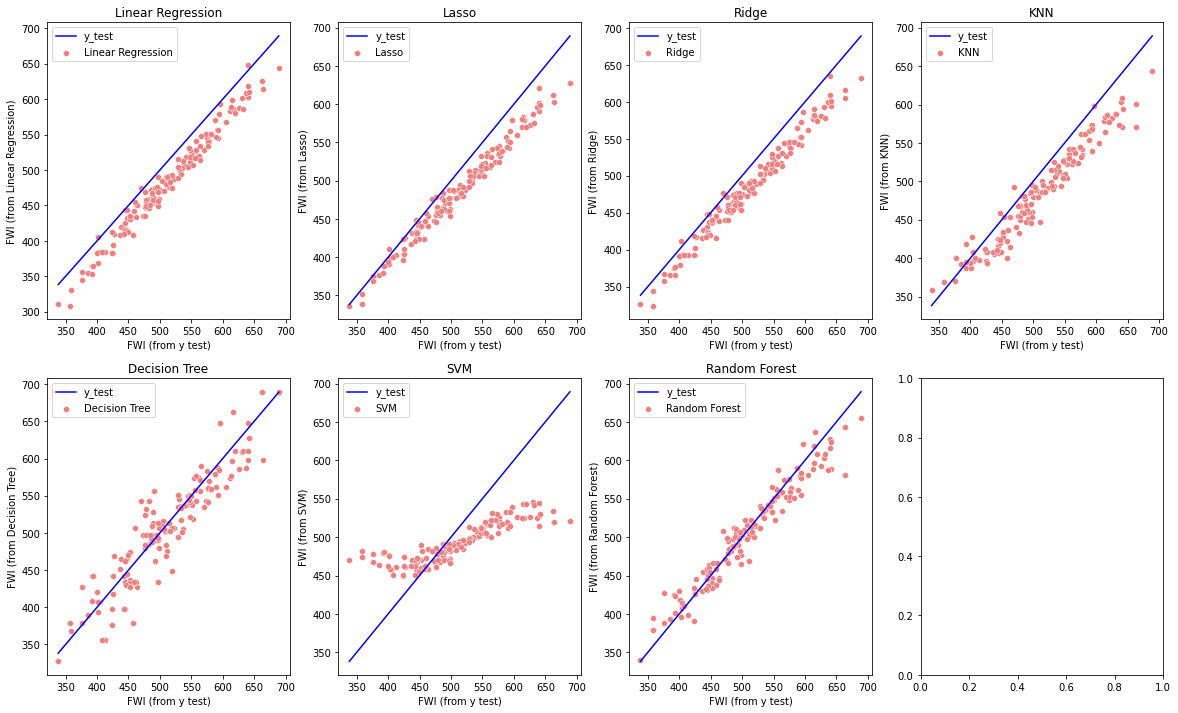

In [46]:
# Let us take a look at the predictions : 

fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.scatterplot(y_test, ltype[items], color = 'lightcoral', legend = True, ax=axes[i,j])
    axes[i,j].set_title(lnames[items])    
    axes[i,j].set_xlabel('FWI (from y test)')
    axes[i,j].set_ylabel(f'FWI (from {lnames[items]})')
    axes[i,j].legend(['y_test', lnames[items] ])
    
    
plt.show()

If we look at the y_test and the predictions, it is observed 
that Random Forest and Decision Tree are the best models. They give a more generalized predictions. 

Let us take a look at the residuals:

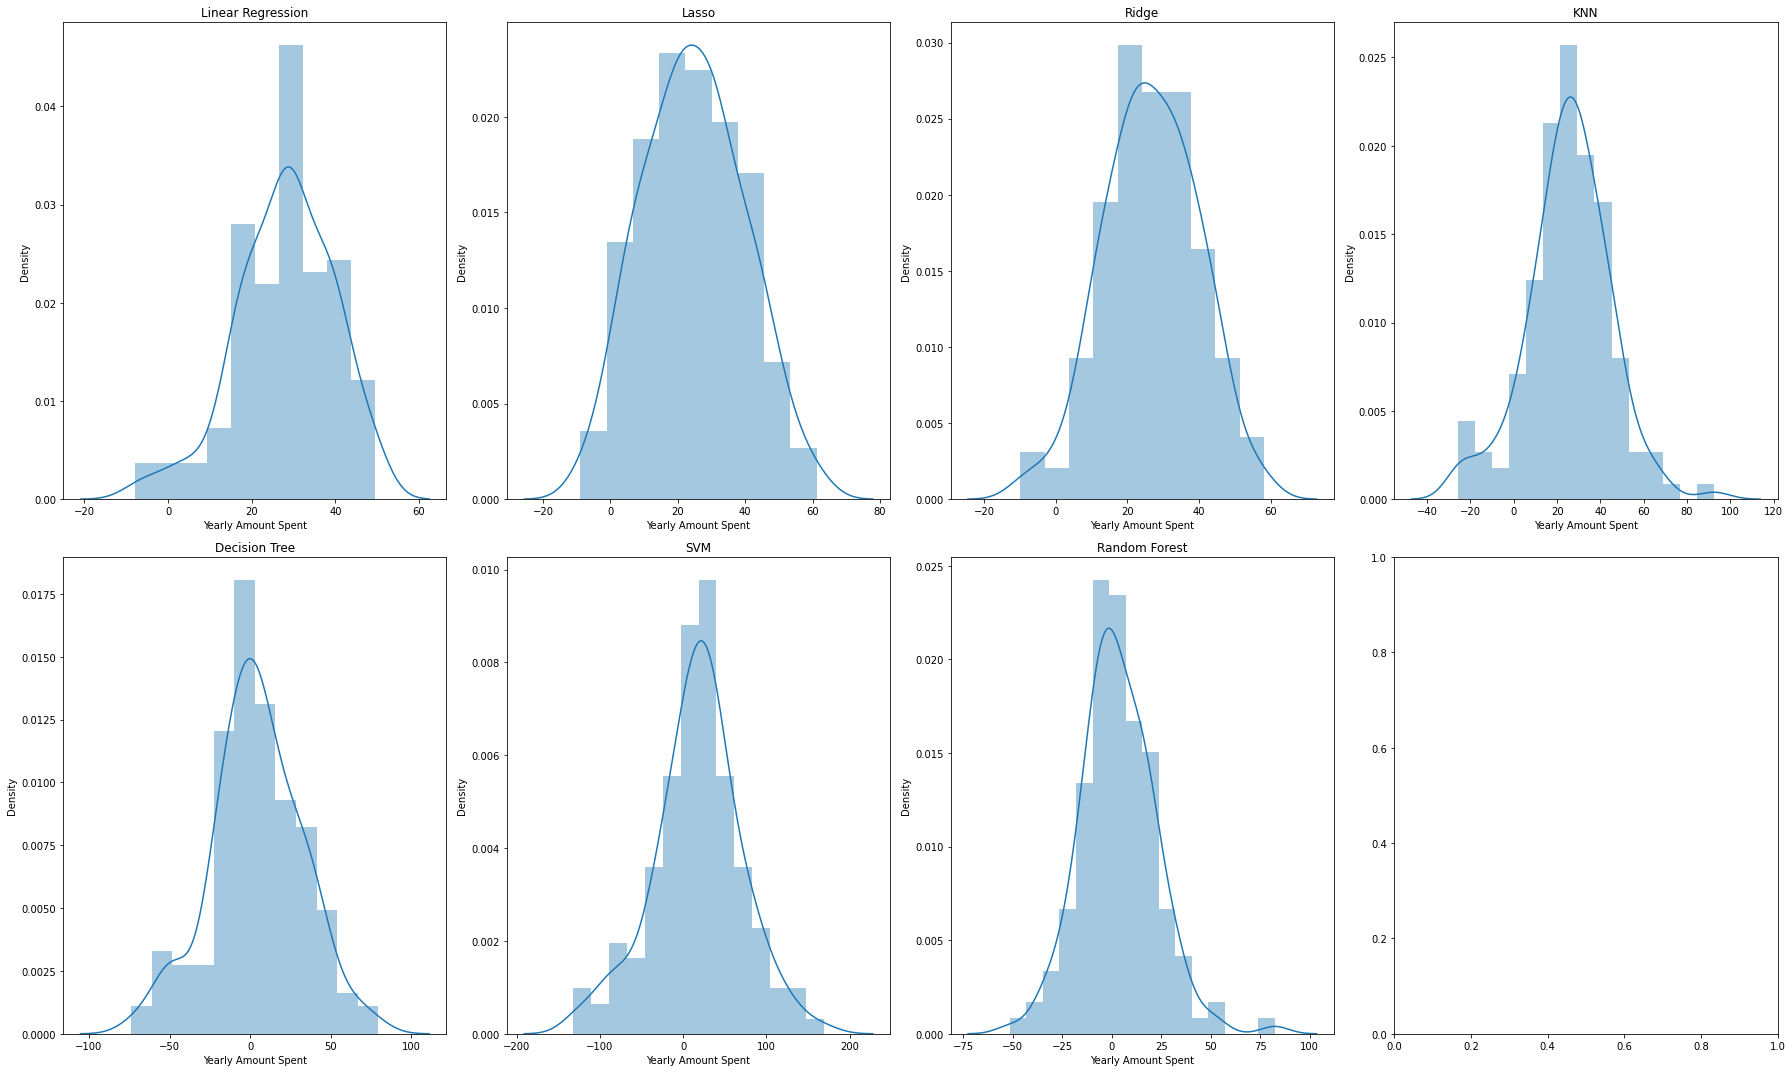

In [47]:
fig, axes = plt.subplots(2,4, figsize=(25,15), tight_layout = True )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.distplot(y_test - ltype[items], kde = True, ax=axes[i,j])
    axes[i,j].set_title(lnames[items])   
    #axes[i,j].set(xlim=(-20, 20))
    
    
plt.show()

Looking at the residual plots we observe the same thing as above, i.e residuals for Random Forest is peaked at zero and then symmetrically distributed about zero with a variance of around 50. We observe a similar pattern in case of Decision 
Tree. The only difference is variance is high in comparison to Random Forest case. 

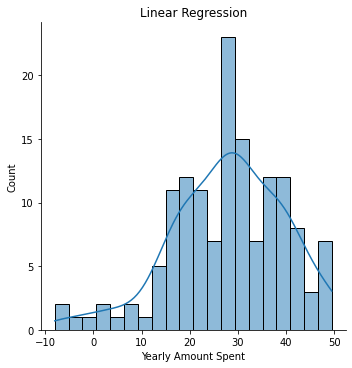

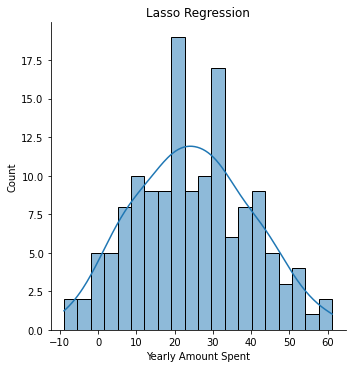

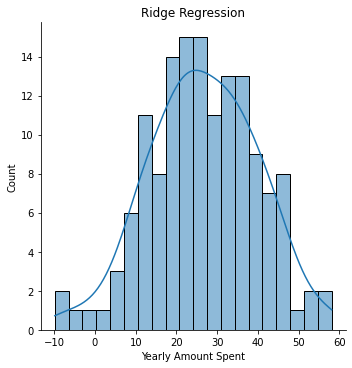

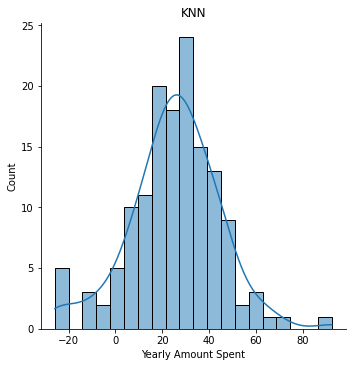

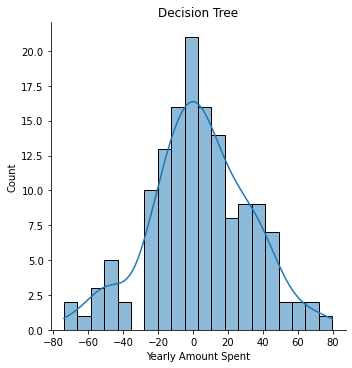

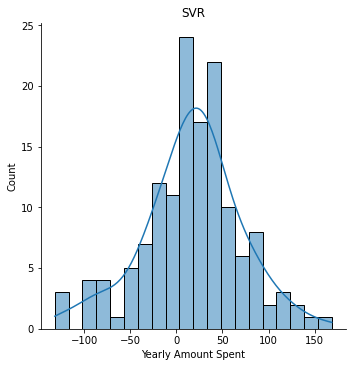

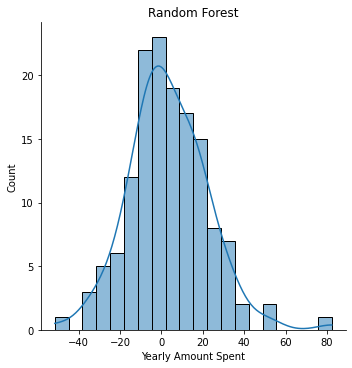

In [48]:
nbins = 20

sns.displot(y_test - predict_liregression, kde = True, bins = nbins)
plt.title('Linear Regression')
sns.displot(y_test - predict_lasso, kde = True, bins = nbins)
plt.title('Lasso Regression')
sns.displot(y_test - predict_ridge, kde = True, bins = nbins)
plt.title('Ridge Regression')
sns.displot(y_test - predict_knn, kde = True, bins = nbins)
plt.title('KNN')
sns.displot(y_test - predict_dtr, kde = True, bins = nbins)
plt.title('Decision Tree')
sns.displot(y_test - predict_svr, kde = True, bins = nbins)
plt.title('SVR')
sns.displot(y_test - predict_rf, kde = True, bins = nbins)
plt.title('Random Forest')
plt.show()

Here also the distribution of the residuals for Random Forest and Decision Tree are following nearly gaussian distribution. 
Rest of them are not gaussian.

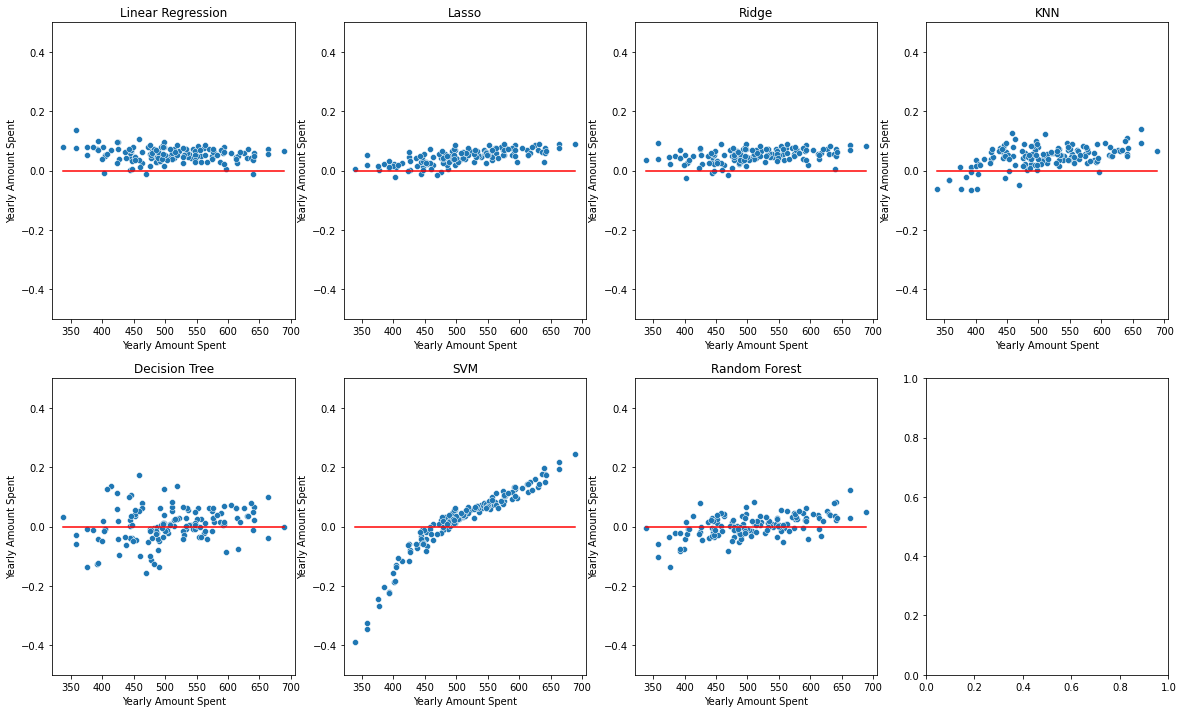

In [49]:
# relative errors :

fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    #sns.distplot(y_test - ltype[items], ax=axes[i,j])
    sns.scatterplot(x= y_test, y = (y_test-ltype[items])/y_test, ax=axes[i,j])
    sns.lineplot(y_test, y_test - y_test, color = 'red', ax = axes[i,j])
    axes[i,j].set_title(lnames[items])    
    axes[i,j].set(ylim=(-0.5, 0.5))
    
plt.show()

**Training and testing accuracy:**

In [50]:
# lets check at the training and testing accuracy : 

train_r2 = [round(r2_score(y_train, regessor.predict(X_train_scaled)), 3), 
            round(r2_score(y_train, regessorlasso.predict(X_train_scaled)), 3),     
            round(r2_score(y_train, regessorridge.predict(X_train_scaled)), 3),
            round(r2_score(y_train, regessorknn.predict(X_train_scaled)), 3),
            round(r2_score(y_train, regessordt.predict(X_train)), 3), 
            round(r2_score(y_train, regessorsvr.predict(X_train_scaled)), 3), 
            round(r2_score(y_train, regressorRF.predict(X_train)), 3)
           ]

test_r2 = [round(r2_score(y_test, predict_liregression), 3), 
            round(r2_score(y_test, predict_lasso), 3),     
            round(r2_score(y_test, predict_ridge), 3),
            round(r2_score(y_test, predict_knn), 3),
            round(r2_score(y_test, predict_dtr), 3), 
            round(r2_score(y_test, predict_svr), 3), 
            round(r2_score(y_test, predict_rf), 3)
           ]

df_test_train_scores = pd.DataFrame({'Train R2 Score' : train_r2, 
                                     'Test R2 Score' : test_r2},
                                     index = ['Linear Regression', 'Lasso', 'Ridge', 
                                  'KNN', 'Decision Tree', 'SVR', 'Random Forest'])
#print(df_test_train_scores)
df_test_train_scores.sort_values(by=['Test R2 Score'], ascending = False)

,Train R2 Score,Test R2 Score
Random Forest,0.990,0.931
Decision Tree,1.000,0.849
Lasso,0.959,0.846
Ridge,0.973,0.837
Linear Regression,0.979,0.830
KNN,0.960,0.813
SVR,0.544,0.425


This training and testing accuracy for different models show that the best model is Random Forest. The training and testing r2 scores are not significantly different which can help to conclude that Random Forest model suffers least overfitting among all. If we take look at the prediction scattered plots, this can be understood deeply. As this particular model is not overfitting (or we might safely say that overfitting is the least in this case), the prediction is much more generalized. Hence, for prediction we may use this model as a baseline and ofcourse one can find the best fit using hyperparameter tuning (In this notebook we are not performing). 

In [51]:
#https://www.kaggle.com/code/dkurbatovv/linear-regression-e-commerce

#A very good read : 
# https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/    

# Conclusion : 

For this dataset, the aim is to find/predict that whether the app or the website will return good revenues to the business. 
For this the basic data exploration is done using conventional methods. Being a regression problem, multicollinearity was checked and features were selected in usual manner. Also outliers have been taken care of. 

**The conclusion is one should go with the app.**

This conclusion was obtained and verified after looking at the heatmap, feature importance, removing the outliers. 

After all these several models were used to predict the outcomes. The training and testing accuracy has been also studied along with the r2 score and adjusted r2 score as metric. The predictions for test data and the residuals were also studied. It was found that simple linear model is overpredicting the test data. Random Forest Regressor works best for this data. 

# References : 

- https://www.kaggle.com/code/rmeysakefel/amount-spent-prediction-with-linear-regression

- https://www.kaggle.com/code/erolmasimov/ecommerce-data-analysis

-  Some good reads for VIF : 

   1. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/  

   2. https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f   

   3. https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a    

   4. https://towardsdatascience.com/multicollinearity-why-is-it-bad-5335030651bf   

   5. https://medium.com/@raj5287/effects-of-multi-collinearity-in-logistic-regression-svm-rf-af6766d91f1b  

   6. https://www.kaggle.com/code/sjodcre/multicollinearity-and-how-it-affects-your-model  

   7. https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

   8. https://github.com/ptyadana/Data-Science-and-Machine-Learning-Projects-Dojo/blob/master/Data%20Science%20and%20Machine%20Learning%20Bootcamp%20-%20JP/11-Linear-Regression/02-Linear%20Regression%20-%20Ecommerce%20Project.ipynb


- Selecting the best features for the problem. 
 Good reads : 
 1. https://www.naukri.com/learning/articles/feature-selection-techniques-python-code/
 2. https://machinelearningmastery.com/feature-selection-machine-learning-python/
 3. https://machinelearningmastery.com/feature-selection-for-regression-data/
 4. https://amueller.github.io/aml/05-advanced-topics/12-feature-selection.html


- Evaluating a Linear Regression Model  
 1. https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/



